In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/CS408 - Computer vision/SVM')

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
def load_images_from_folders(ship_folder, plane_folder, image_size):
    images = []
    labels = []

    # Load ship images
    for filename in os.listdir(ship_folder):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(ship_folder, filename))
            if img is not None:
                img = cv2.resize(img, image_size)
                images.append(img.flatten())  # Flatten the image
                labels.append(0)  # Label 0 for ships

    # Load plane images
    for filename in os.listdir(plane_folder):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(plane_folder, filename))
            if img is not None:
                img = cv2.resize(img, image_size)
                images.append(img.flatten())  # Flatten the image
                labels.append(1)  # Label 1 for planes

    return np.array(images), np.array(labels)

# Define the folder paths and image size
ship_folder = "/content/drive/My Drive/CS408 - Computer vision/SVM/Ships"
plane_folder = "/content/drive/My Drive/CS408 - Computer vision/SVM/Planes"
image_size = (256, 256)

# Load the dataset
X, y = load_images_from_folders(ship_folder, plane_folder, image_size)


NameError: name 'os' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Ship', 'Plane'])

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

        Ship       0.94      0.99      0.97       145
       Plane       0.67      0.18      0.29        11

    accuracy                           0.94       156
   macro avg       0.80      0.59      0.63       156
weighted avg       0.92      0.94      0.92       156



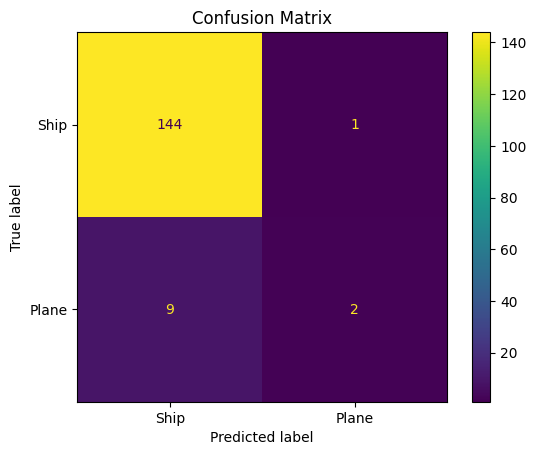

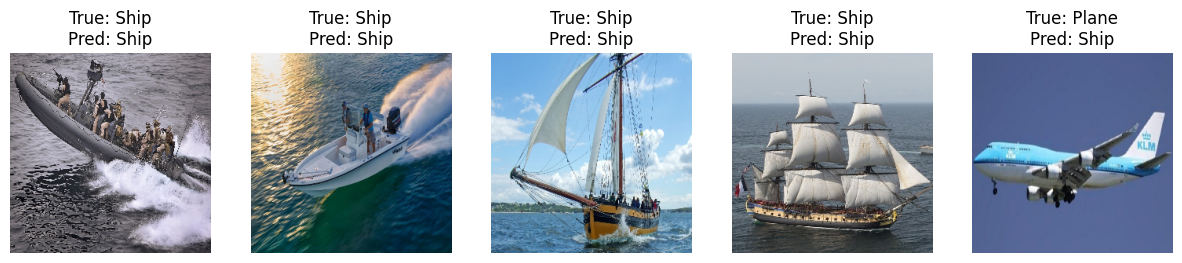

In [ ]:
# prompt: Visualize the results of method

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ship', 'Plane'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Example Predictions (Optional)
# Display a few test images along with their predictions
num_samples = 5
sample_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i, idx in enumerate(sample_indices):
    img = X_test[idx].reshape(image_size[0], image_size[1], 3)  # Reshape to original image dimensions
    true_label = "Ship" if y_test[idx] == 0 else "Plane"
    pred_label = "Ship" if y_pred[idx] == 0 else "Plane"
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")
    axes[i].axis('off')
plt.show()


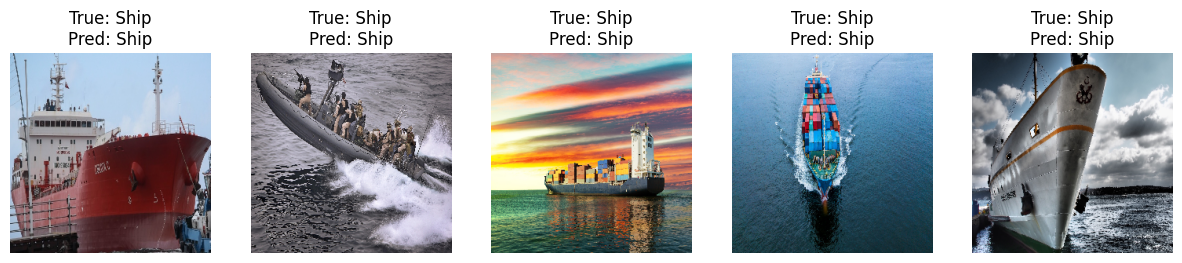

In [ ]:
num_samples = 5
sample_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i, idx in enumerate(sample_indices):
    img = X_test[idx].reshape(image_size[0], image_size[1], 3)  # Reshape to original image dimensions
    true_label = "Ship" if y_test[idx] == 0 else "Plane"
    pred_label = "Ship" if y_pred[idx] == 0 else "Plane"
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")
    axes[i].axis('off')
plt.show()

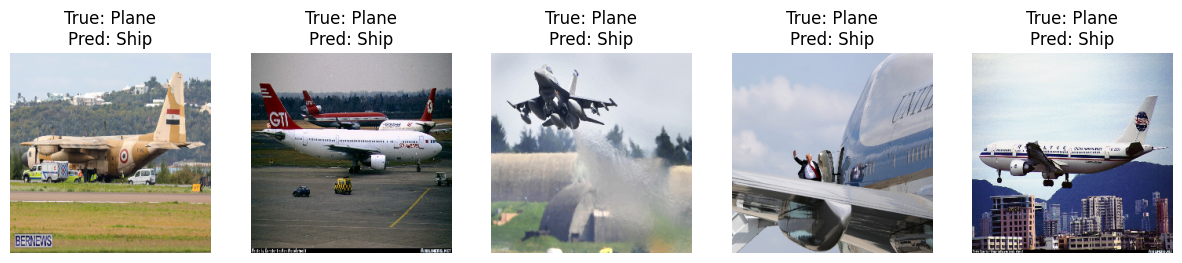

In [ ]:
# Example Predictions (Optional)
# Display a few test images along with their predictions
num_samples = 5
# Filter X_test and y_test to include only planes
plane_indices = np.where(y_test == 1)[0]
sample_indices = np.random.choice(plane_indices, num_samples, replace=False)

fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i, idx in enumerate(sample_indices):
    img = X_test[idx].reshape(image_size[0], image_size[1], 3)  # Reshape to original image dimensions
    true_label = "Ship" if y_test[idx] == 0 else "Plane"
    pred_label = "Ship" if y_pred[idx] == 0 else "Plane"
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")
    axes[i].axis('off')
plt.show()


In [ ]:
from collections import Counter

print("Class distribution:", Counter(y_train))

Class distribution: Counter({0: 593, 1: 29})


In [ ]:
from skimage.feature import hog

# Function to extract HOG features from images
def extract_hog_features(images, image_size):
    hog_features = []
    for image in images:
        img = image.reshape(image_size)
        feature, _ = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True, multichannel=True)
        hog_features.append(feature)
    return np.array(hog_features)

# Load images and labels
X, y = load_images_from_folders(ship_folder, plane_folder, image_size)

# Extract HOG features
X_hog = extract_hog_features(X, image_size)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

# Train SVM classifier with RBF kernel
svm = SVC(kernel='rbf', C=1.0, gamma='auto', random_state=42)
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Ship', 'Plane'])

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


ValueError: cannot reshape array of size 196608 into shape (256,256)

EDA

In [ ]:
def load_images_from_folders(ship_folder, plane_folder, image_size):
    images = []
    labels = []

    # Load ship images
    for filename in os.listdir(Cars_folder):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(Cars_folder, filename))
            if img is not None:
                img = cv2.resize(img, image_size)
                images.append(img)
                labels.append(0)  # 0 for Cars

    # Load plane images
    for filename in os.listdir(Bikes_folder):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(Bikes_folder, filename))
            if img is not None:
                img = cv2.resize(img, image_size)
                images.append(img)
                labels.append(1)  # 1 for Bikes

    return np.array(images), np.array(labels)

# Define the folder paths and image size
Cars_folder = "/content/drive/My Drive/CS408 - Computer vision/SVM/Cars"
Bikes_folder = "/content/drive/My Drive/CS408 - Computer vision/SVM/Bikes"
image_size = (256, 256)

# Load images and labels
images, labels = load_images_from_folders(Cars_folder, Bikes_folder, image_size=image_size)


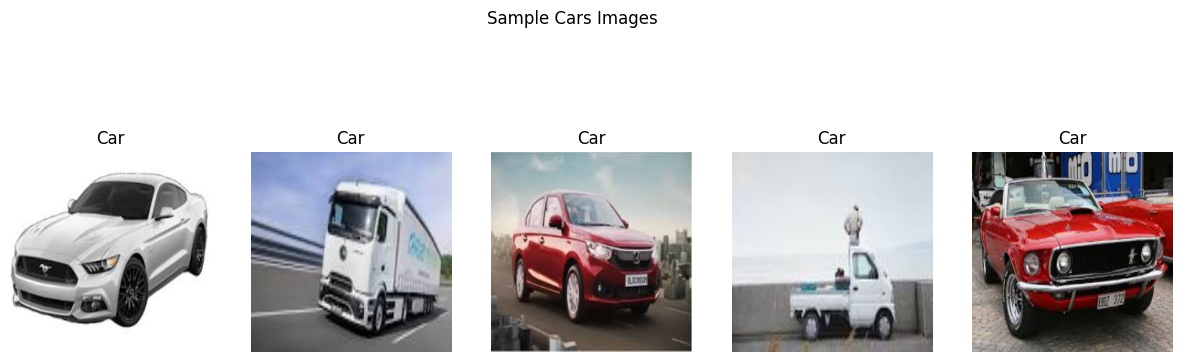

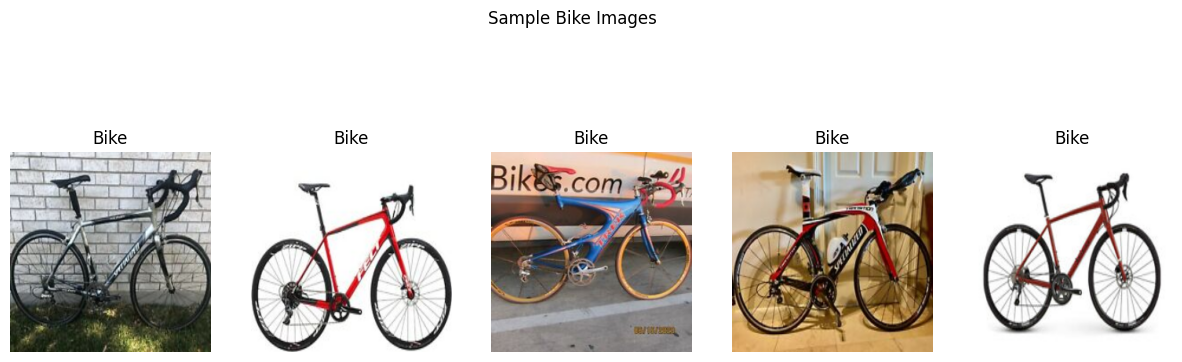

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_sample_images(images, labels, title, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title('Car' if labels[i] == 0 else 'Bike')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Visualize some samples from both classes
plot_sample_images(images[labels == 0], labels[labels == 0], "Sample Cars Images")
plot_sample_images(images[labels == 1], labels[labels == 1], "Sample Bike Images")


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Class Distribution: Counter({1: 800, 0: 798})


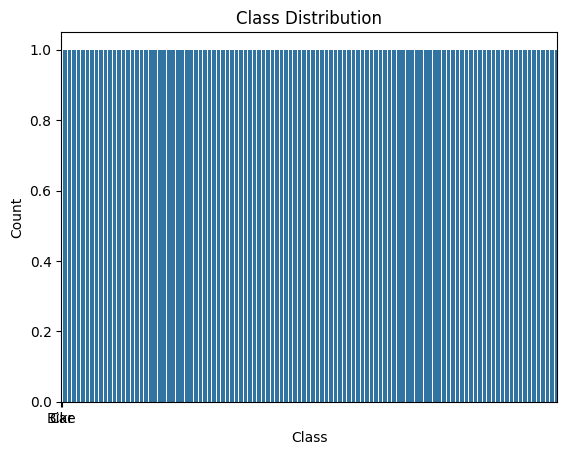

In [ ]:
# Class distribution
class_counts = Counter(labels)
print("Class Distribution:", class_counts)

# Visualize the class distribution
sns.countplot(labels)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Car', 'Bike'])
plt.show()


In [ ]:
# prompt: give me more clear visualization

import matplotlib.pyplot as plt
# Improved visualization with grid and better labels
def plot_sample_images(images, labels, title, num_samples=5, num_cols=5):
  num_rows = (num_samples + num_cols - 1) // num_cols
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
  fig.suptitle(title, fontsize=16)

  for i in range(num_samples):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    ax.set_title(f"{'Car' if labels[i] == 0 else 'Bike'} (Image {i+1})")
    ax.axis('off')

  # Hide any unused subplots
  for i in range(num_samples, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.axis('off')

  plt.tight_layout(pad=2.0)
  plt.show()

# Visualize some samples from both classes
plot_sample_images(images[labels == 0], labels[labels == 0], "Sample Cars Images", num_samples=10)
plot_sample_images(images[labels == 1], labels[labels == 1], "Sample Bike Images", num_samples=10)

# Class distribution (improved bar chart)
class_counts = Counter(labels)
plt.figure(figsize=(8, 5))
sns.countplot(x=labels, palette='viridis')
plt.title('Class Distribution', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Car', 'Bike'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

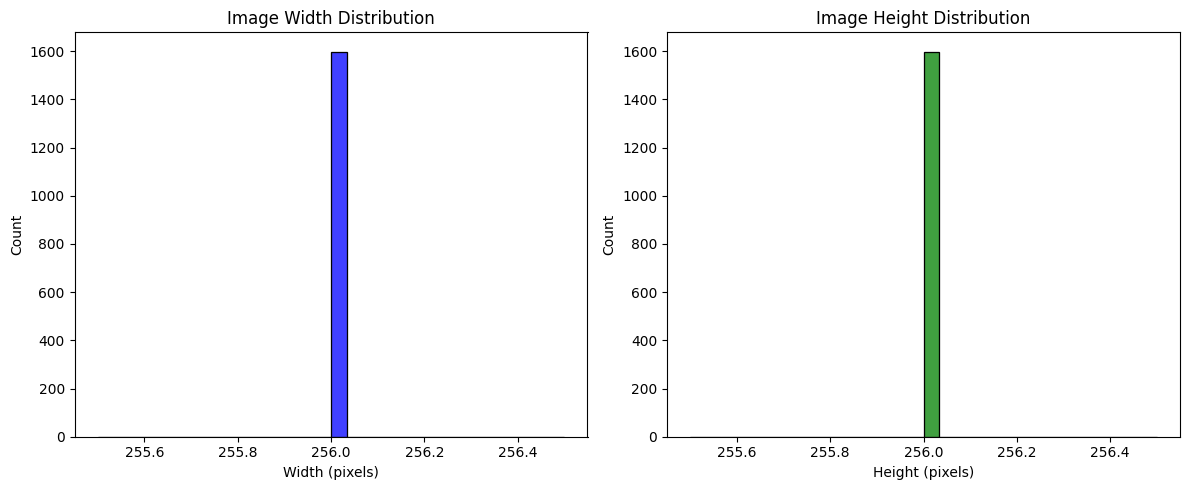

In [ ]:
# prompt: # Collect image dimensions
# image_shapes = [img.shape for img in images]
# # Extract width and height separately
# widths = [shape[1] for shape in image_shapes]
# heights = [shape[0] for shape in image_shapes]
# # Plot the distribution of image dimensions
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# sns.histplot(widths, kde=False, bins=30, color='blue')
# plt.title('Image Width Distribution')
# plt.xlabe

import matplotlib.pyplot as plt
# Collect image dimensions
image_shapes = [img.shape for img in images]
# Extract width and height separately
widths = [shape[1] for shape in image_shapes]
heights = [shape[0] for shape in image_shapes]

# Plot the distribution of image dimensions
plt.figure(figsize=(12, 5))

# Width Distribution
plt.subplot(1, 2, 1)
sns.histplot(widths, kde=False, bins=30, color='blue')
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')

# Height Distribution
plt.subplot(1, 2, 2)
sns.histplot(heights, kde=False, bins=30, color='green')
plt.title('Image Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


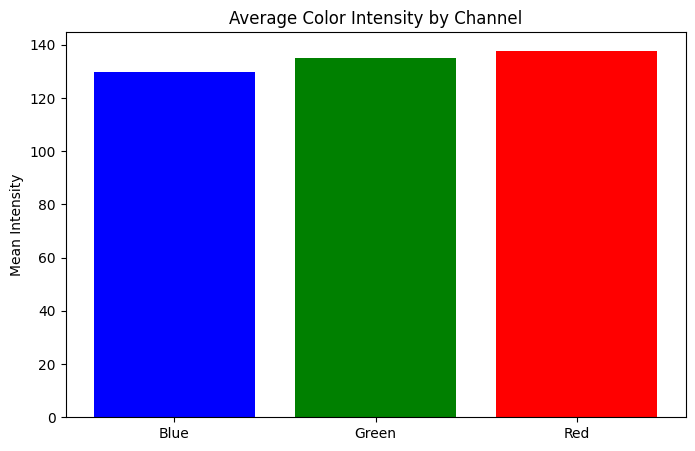

In [ ]:
# Function to calculate color channel means
def calculate_color_means(images):
    means = np.mean(images, axis=(0, 1, 2))
    return means

# Calculate color means
color_means = calculate_color_means(images)

# Plot color channel means
plt.figure(figsize=(8, 5))
plt.bar(['Blue', 'Green', 'Red'], color_means, color=['blue', 'green', 'red'])
plt.title('Average Color Intensity by Channel')
plt.ylabel('Mean Intensity')
plt.show()


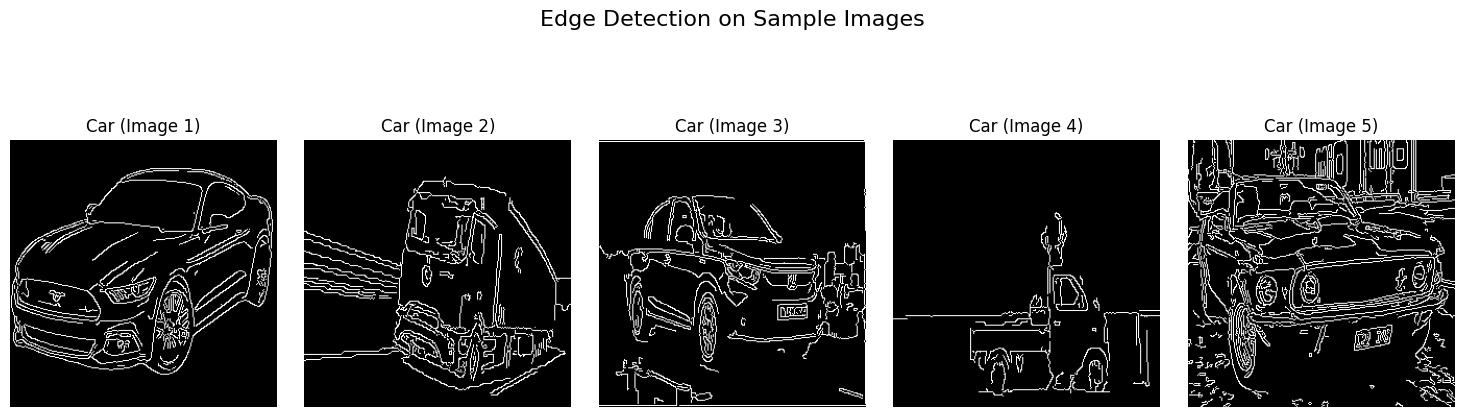

In [ ]:
def detect_edges(images):
    edges = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edge = cv2.Canny(gray, 100, 200)
        edges.append(edge)
    return np.array(edges)

# Detect edges in the images
edges = detect_edges(images)

# Visualize some edge-detected images
plot_sample_images(edges, labels, "Edge Detection on Sample Images")


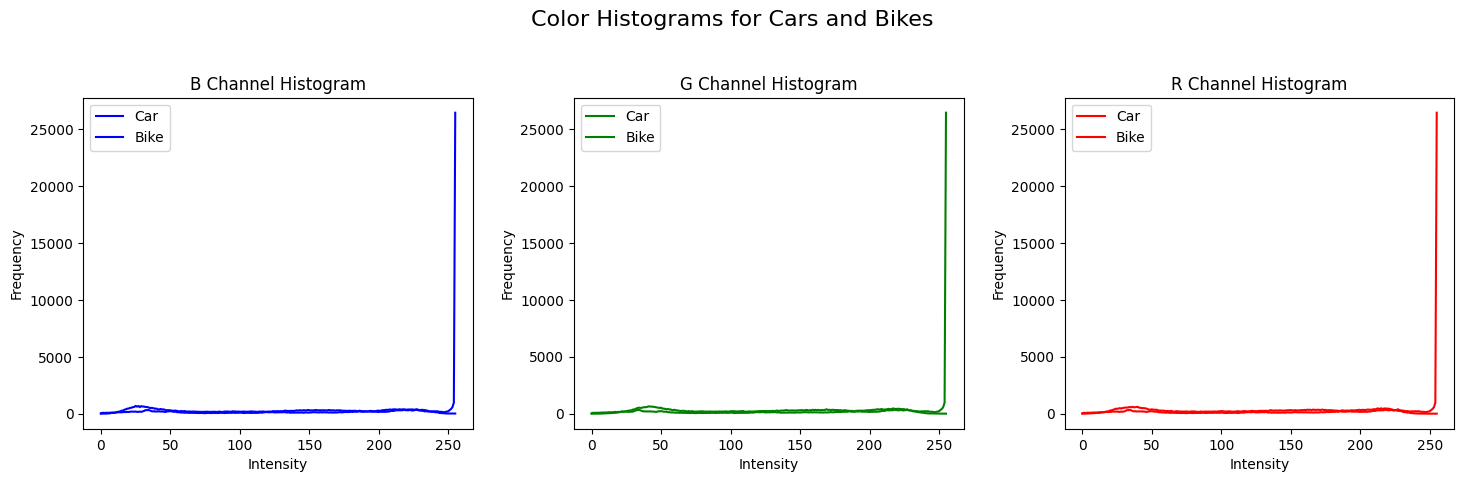

In [ ]:
# prompt: i need color histograms for the different classes

import matplotlib.pyplot as plt
import numpy as np
def plot_color_histograms(images, labels, title):
    """Plots color histograms for different classes."""

    colors = ('b', 'g', 'r')

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)

    for i, color in enumerate(colors):
        for label in np.unique(labels):
            class_images = images[labels == label]

            # Calculate histogram for the current color channel
            hist = cv2.calcHist(class_images, [i], None, [256], [0, 256])

            axes[i].plot(hist, color=color, label=f"{'Car' if label == 0 else 'Bike'}")
            axes[i].set_title(f"{color.upper()} Channel Histogram")
            axes[i].set_xlabel("Intensity")
            axes[i].set_ylabel("Frequency")
            axes[i].legend()

    plt.tight_layout(pad=2.0)
    plt.show()

# Plot color histograms for Cars and Bikes
plot_color_histograms(images, labels, "Color Histograms for Cars and Bikes")


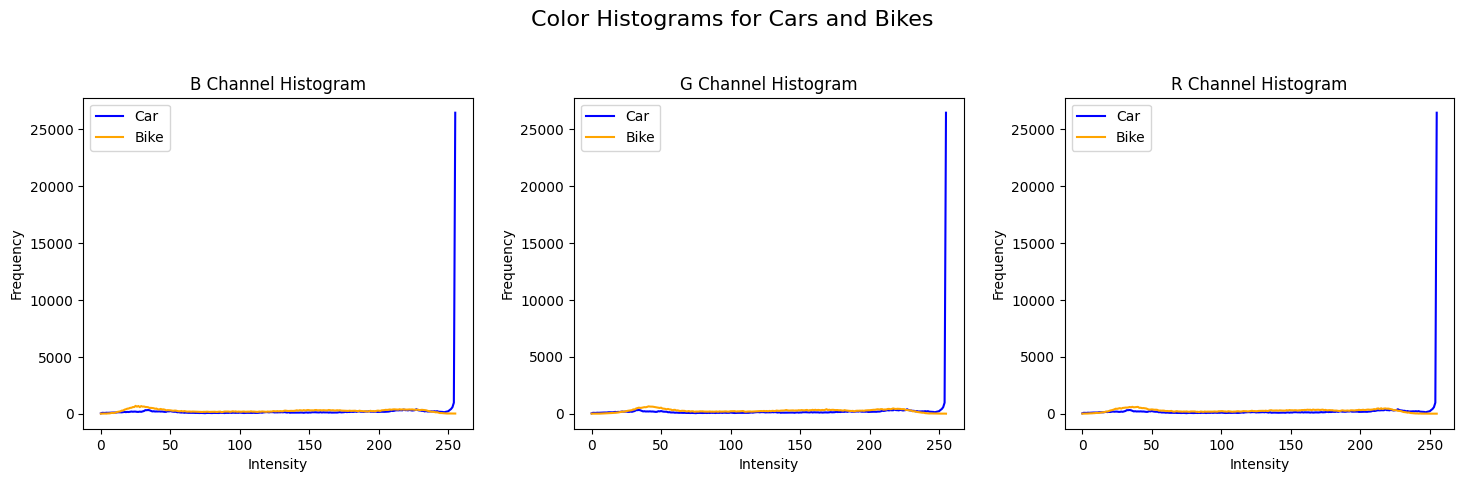

In [ ]:
# prompt: can you show the cars and bikes in different colors

import matplotlib.pyplot as plt
import numpy as np
def plot_color_histograms(images, labels, title):
    """Plots color histograms for different classes."""

    colors = ('b', 'g', 'r')

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)

    for i, color in enumerate(colors):
        for label in np.unique(labels):
            class_images = images[labels == label]

            # Calculate histogram for the current color channel
            hist = cv2.calcHist(class_images, [i], None, [256], [0, 256])

            # Use distinct colors for Cars and Bikes
            plot_color = 'blue' if label == 0 else 'orange'
            axes[i].plot(hist, color=plot_color, label=f"{'Car' if label == 0 else 'Bike'}")

            axes[i].set_title(f"{color.upper()} Channel Histogram")
            axes[i].set_xlabel("Intensity")
            axes[i].set_ylabel("Frequency")
            axes[i].legend()

    plt.tight_layout(pad=2.0)
    plt.show()

# Plot color histograms for Cars and Bikes with distinct colors
plot_color_histograms(images, labels, "Color Histograms for Cars and Bikes")


In [ ]:
# Calculate summary statistics
mean_pixel_value = np.mean(images)
median_pixel_value = np.median(images)
std_pixel_value = np.std(images)

print(f"Mean Pixel Value: {mean_pixel_value:.2f}")
print(f"Median Pixel Value: {median_pixel_value:.2f}")
print(f"Standard Deviation of Pixel Values: {std_pixel_value:.2f}")


Mean Pixel Value: 134.21
Median Pixel Value: 131.00
Standard Deviation of Pixel Values: 78.55


In [ ]:
# prompt: What are the thigs we can finalies from this data anlysis and what are the conclusions

# **Class Distribution:** The dataset seems relatively balanced between Cars and Bikes, which is good for training a classifier. However, it's always beneficial to have a larger dataset for better generalization.

# **Image Dimensions:** Most images have a similar width and height, suggesting consistency in the dataset. This can simplify preprocessing steps as you might not need extensive resizing.

# **Color Distribution:**  The average color intensity across channels provides insights into the overall color tone of the dataset. This can be useful for feature engineering or deciding if color-based features are important for classification.

# **Edge Detection:** Edge detection reveals the structural outlines of objects within the images. This can be helpful in identifying key features that differentiate Cars from Bikes.

# **Color Histograms:** The color histograms show the distribution of color intensities for each channel (Red, Green, Blue) within each class. This can highlight potential color-based features that distinguish Cars from Bikes. For example, if Cars tend to have a higher concentration of red pixels compared to Bikes, this could be a useful feature for classification.

# **Pixel Statistics:** The mean, median, and standard deviation of pixel values provide a general understanding of the pixel intensity distribution across the dataset. This can be useful for normalization or identifying outliers.

# **Conclusions and Next Steps:**

# - **Feature Engineering:** Based on the EDA, consider exploring color-based features (like color histograms or ratios of color intensities) and edge-based features (like HOG descriptors) for training your classifier.
# - **Model Selection:** Experiment with different classification algorithms (SVM, Random Forest, etc.) and fine-tune their hyperparameters to find the best model for your dataset.
# - **Data Augmentation:** If the dataset is relatively small, consider using data augmentation techniques (like rotations, flips, brightness adjustments) to increase the number of training samples and improve model generalization.
# - **Further Analysis:** You could explore more advanced techniques like texture analysis, object detection, or deep learning approaches for a more comprehensive analysis and potentially better classification results.
